# Лабораторна робота №1
## Гусак Владислав

Імпорутємо потрібні модулі, та готуємо модель, з якою будемо працювати

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [3]:
def model(x,t, gamma, sigma):
    dxdt=(gamma-sigma)*x
    return dxdt

Тестуємо модель, на значенні $\varepsilon$=0.3, цей приклад наведений в документі з завданням

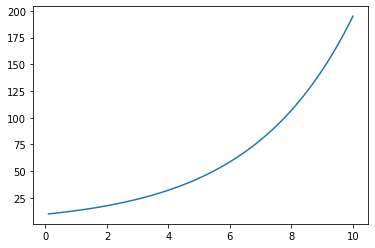

In [4]:
t=np.linspace(0.1, 10, 100)
x=odeint(model,10,t, (0.9, 0.6))
plt.plot(t, x)

Модель, очевидно, працює.

## Завдання №1

Створюємо змінні для $\Theta$, $\gamma$, $\sigma$ та $\varepsilon$

In [5]:
theta=0.1/4
gamma=[0.9+theta, 1+theta, 1.1+theta]
sigma=0.6-theta
epsi=[gamma[0]-sigma, gamma[1]-sigma, gamma[2]-sigma]
x0=50-4

Використовуючи модель будуємо графіки для різних позитивних значень $\varepsilon$

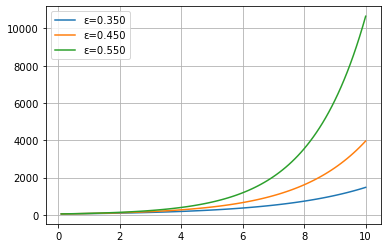

In [6]:
fig, ax=plt.subplots()
ax.grid()
for gam in gamma:
    x=odeint(model,x0, t, (gam, sigma))
    plt.plot(t, x)
plt.legend(['\u03B5={:.3f}'.format(epsi[0]), '\u03B5={:.3f}'.format(epsi[1]), '\u03B5={:.3f}'.format(epsi[2])])

Можемо зробити висоновок зо зі збільшенням $\varepsilon$ росте швидкість росту популяції

## Завдання №2

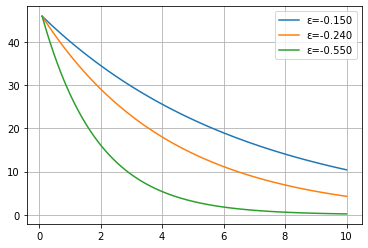

In [7]:
theta=0.1/4
gamma=[0.4+theta,0.31+theta, theta]
sigma=0.6-theta
epsi=np.array([gamma[0]-sigma, gamma[1]-sigma, gamma[2]-sigma])
x0=50-4
fig, ax=plt.subplots()
ax.grid()
for gam in gamma:
    x=odeint(model,x0, t, (gam, sigma))
    plt.plot(t, x)
plt.legend(['\u03B5={:.3f}'.format(epsi[0]), '\u03B5={:.3f}'.format(epsi[1]), '\u03B5={:.3f}'.format(epsi[2])])

Повторишви маніпуляції з першого завдання, будуємо графіки, та робим висновок, що зменшення $\varepsilon$ збільшує швидкість зменшення чисельності популяції

## Задання №3

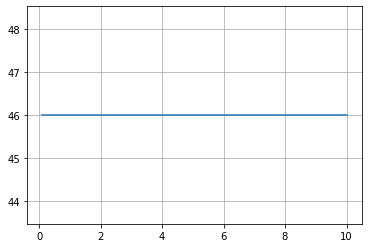

In [8]:
theta=0.1/4
gamma=0.6+theta
sigma=0.6+theta
epsi=0
x0=50-4
fig, ax=plt.subplots()
ax.grid()
x=odeint(model,x0, t, (gamma, sigma))
plt.plot(t, x)

При $\varepsilon$=0 побуляція стабільна

## Задвання №4

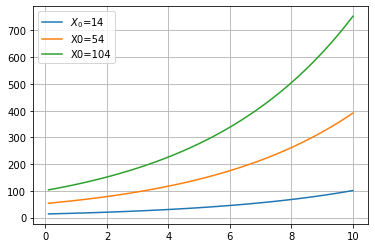

In [11]:
theta=0.1/4
gamma=0.8-theta
sigma=0.6-theta
epsi=0.2
x0=(10+4, 50+4, 104)
fig, ax=plt.subplots()
ax.grid()
for x00 in x0:
    x=odeint(model,x00, t, (gamma, sigma))
    plt.plot(t, x)
plt.legend(['$X_0$={}'.format(x0[0]), 'X0={}'.format(x0[1]), 'X0={}'.format(x0[2])])

З графіків робимо висновок що при вищих Х0, швидкість росту популяції росте

Порівнюємо $T_{0.5}$ з графіків з розрахованим і бачимо що вони співпадають. 
Будуємо графік залежності $T_{0.5}(|\varepsilon|)$

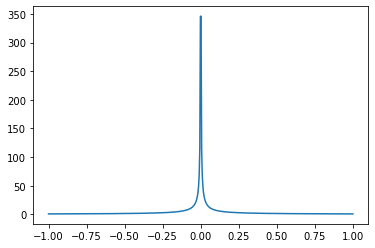

In [145]:
epsi=np.linspace(-1, 1, 500)
T05=np.log(2)/abs(epsi)
plt.figure()
plt.plot(epsi, T05)

Робимо висновок що при наблеженні $\varepsilon$ до 0, $T_{0.5}$ росте асемптотично до безкінечності

Оцінюємо швидкість з чисельності популяції при $t=0$. Будуємо відповідний просторовий графік, де на одній осі в межах від 1 до 100 Х0, на іншій $\varepsilon$ в межах від -1 до 1, і на осі $z$ $\frac{\partial x}{\partial t}$

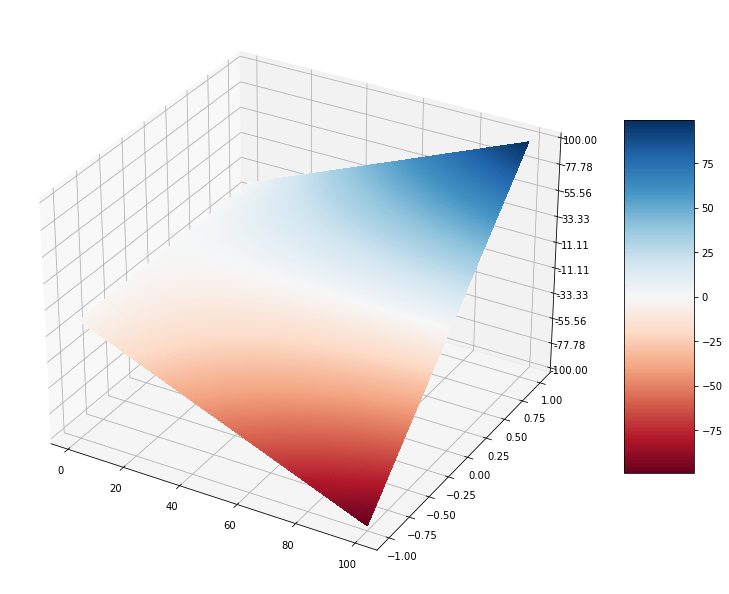

In [146]:
X0=np.linspace(1, 100, 100)
epsi=np.linspace(-1, 1, 500)
def func(X0, epsi):
    dxdt=epsi*X0
    return dxdt
X,Y = np.meshgrid(X0, epsi)
Z=func(X,Y)
fig = plt.figure(figsize=(13,13))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

Робимо висновок що є позитивна залежінсть між початковим значенням $x$ та швидкістю зміни чисельності популяції.

Як приклад системи яка підпадає під закономірності які ми тут досліджували - це вимираючий вид. При дуже жорских селективних чинниках кількість особин в популяції буде постійно зменшуватись і не встигати відновлюватись.

## Завдання 5
Щоб знайти значення $\varepsilon$ оцінюємо через який час населення України впаде на половину

In [147]:
year1=138.3*2
pop=42200
pop2=pop/2
years=0
while pop>=pop2:
    pop=pop-year1
    years+=1
pop
years

77

Знаходимо $\varepsilon$

In [148]:
epsi=np.log(2)/77
epsi

0.009001911435843446

Створюємо модель, і будуємо графік на 200 років вперед

Text(0.5, 1.0, 'Зміна населення')

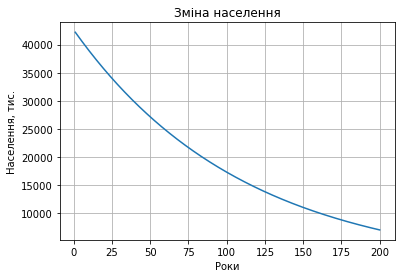

In [149]:
def model(x,t):
    epsi=-0.009001911435843446
    dxdt=epsi*x
    return dxdt
fig, ax=plt.subplots()
ax.grid()
t=np.linspace(1, 200, 1000)
x=odeint(model,42200,t)
plt.plot(t, x)
plt.ylabel('Населення, тис.')
plt.xlabel('Роки')
ax.set_title('Зміна населення')

Робимо схожу оцінку спаду населення України з врахуванням того, що середня смертність в Уркаїні від COVID-19 300 людей в день

In [150]:
year2=year1+(300*365)/1000
year2

386.1

In [151]:
pop=42200
pop2=pop/2
years=0
while pop>=pop2:
    pop=pop-year2
    years+=1
pop
years
epsi=np.log(2)/55
epsi

0.012602676010180823

Text(0.5, 1.0, 'Зміна населення з врахуванням COVID-19')

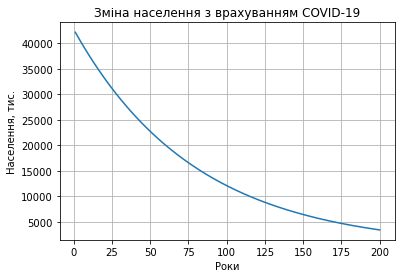

In [152]:
def model(x,t):
    epsi=-0.012602676010180823
    dxdt=epsi*x
    return dxdt
fig, ax=plt.subplots()
ax.grid()
t=np.linspace(1, 200, 1000)
x=odeint(model,42200,t)
plt.plot(t, x)
plt.ylabel('Населення, тис.')
plt.xlabel('Роки')
ax.set_title('Зміна населення з врахуванням COVID-19')

Як можна бачити з графіків, різниця в населені через 200 років становить майже 2 рази.

## Вистовок

Виконавши лабораторну роботу, навчились будувати математичні моделі, та робити аналіз отриманих результатів з графіків та числовими методами. 
Проаналізували вплив $\varepsilon$ та $x0$ на систему зміни кількості особин в популяції. Також дослідили взаємний вплив $\varepsilon$ та $x0$ на початкову швидкість росту популяції та вплив $\varepsilon$ на $T_{0.5}$.
Побудували модель зміни населення України, з впливом COVID-19 та без.